<h2 style="color: blue; text-align: center; font-size: 25px;"><b>K Means Clustering for Customer Segmentation</b></h2>

### Problem Statement:

Analyze the Black Friday sales dataset to identify customer purchasing patterns, demographic trends, and product preferences. The goal is to segment customers into distinct groups based on their purchasing behavior and demographic attributes, enabling businesses to create personalized marketing strategies, optimize product offerings, and improve overall customer satisfaction. Additionally, predictive modeling can be applied to estimate future purchase amounts or classify customers into predefined segments based on their profile.

In [2]:
import pandas as pd
import numpy as np
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### About dataset: 
The dataset is about Black Friday sales and contains customer purchase behavior,

In [4]:
df = pd.read_excel("Black_friday_sale.xlsx")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df2 = df.copy()
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df2.drop('Product_Category_2',axis=1,inplace=True)

In [13]:
df2.drop('Product_Category_3',axis=1,inplace=True)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category_1          550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### Encoding the categorical columns

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
l=LabelEncoder()

In [17]:
df2['Age']=l.fit_transform(df2['Age'])

In [18]:
df2['City_Category']=l.fit_transform(df2['City_Category'])

In [19]:
df2['Gender']=l.fit_transform(df2['Gender'])

In [20]:
df2['Product_ID']=l.fit_transform(df2['Product_ID'])

In [22]:
df2['Occupation']=l.fit_transform(df2['Occupation'])

In [24]:
df2['Marital_Status']=l.fit_transform(df2['Marital_Status'])

In [25]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,0,10,0,2,0,3,8370
1,1000001,2376,0,0,10,0,2,0,1,15200
2,1000001,852,0,0,10,0,2,0,12,1422
3,1000001,828,0,0,10,0,2,0,12,1057
4,1000002,2734,1,6,16,2,4+,0,8,7969


In [26]:
df2.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   User_ID             550068 non-null  int64
 1   Product_ID          550068 non-null  int32
 2   Gender              550068 non-null  int32
 3   Age                 550068 non-null  int32
 4   Occupation          550068 non-null  int64
 5   City_Category       550068 non-null  int32
 6   Marital_Status      550068 non-null  int64
 7   Product_Category_1  550068 non-null  int64
 8   Purchase            550068 non-null  int64
dtypes: int32(4), int64(5)
memory usage: 29.4 MB


In [28]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,0,10,0,0,3,8370
1,1000001,2376,0,0,10,0,0,1,15200
2,1000001,852,0,0,10,0,0,12,1422
3,1000001,828,0,0,10,0,0,12,1057
4,1000002,2734,1,6,16,2,0,8,7969


### Scaling using StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler
selected_col=['Gender','Age','Occupation','City_Category','Marital_Status','Product_Category_1','Purchase']
scaler=StandardScaler()
s=scaler.fit_transform(df2[selected_col])

In [45]:
X = df2.copy()
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase
0,1000001,672,0,0,10,0,0,3,8370
1,1000001,2376,0,0,10,0,0,1,15200
2,1000001,852,0,0,10,0,0,12,1422
3,1000001,828,0,0,10,0,0,12,1057
4,1000002,2734,1,6,16,2,0,8,7969


## Elbow Method

In [48]:
from sklearn.cluster import KMeans

In [50]:
inertia_values=[]
k = range(1,10)
for i in k:
    m = KMeans(n_clusters=i)
    m.fit(X)
    inertia_values.append(m.inertia_)

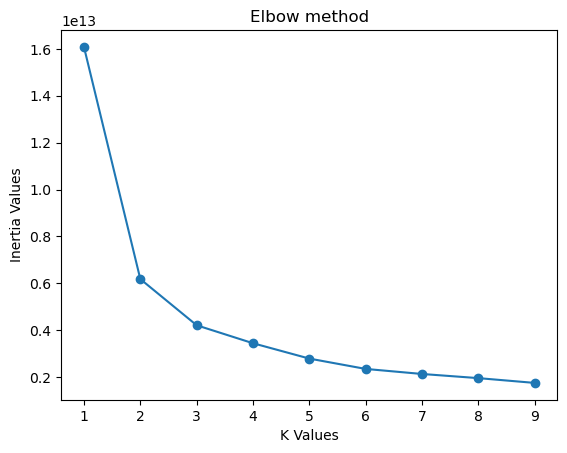

In [52]:
import matplotlib.pyplot as plt

plt.plot(k,inertia_values,marker='o')
plt.title("Elbow method")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")

plt.show()

<font color=green> K is determined as 5

## Applying K-Means Clustering

In [55]:
k=5
kmeans=KMeans(n_clusters=5,random_state=0)

In [57]:
X['cluster']=kmeans.fit_predict(X)

In [59]:
X

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Purchase,cluster
0,1000001,672,0,0,10,0,0,3,8370,2
1,1000001,2376,0,0,10,0,0,1,15200,4
2,1000001,852,0,0,10,0,0,12,1422,1
3,1000001,828,0,0,10,0,0,12,1057,1
4,1000002,2734,1,6,16,2,0,8,7969,2
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,3567,1,5,13,1,1,20,368,1
550064,1006035,3568,0,2,1,2,0,20,371,1
550065,1006036,3568,0,2,15,1,1,20,137,1
550066,1006038,3568,0,6,1,2,0,20,365,1


<Axes: xlabel='Age', ylabel='Purchase'>

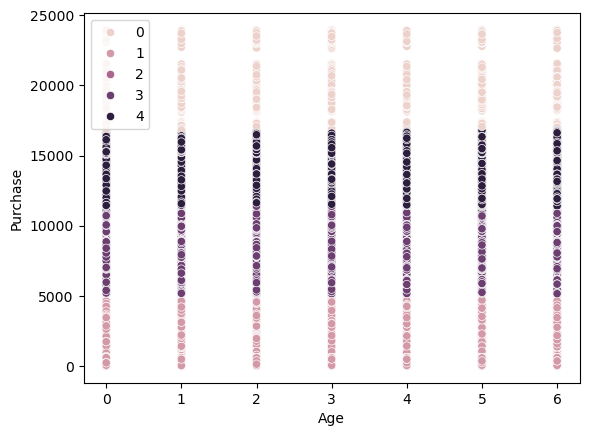

In [61]:
# Create a scatter plot with Age and Purchase

import seaborn as sns
sns.scatterplot(data = X, x = 'Age', y = 'Purchase', hue = kmeans.labels_)

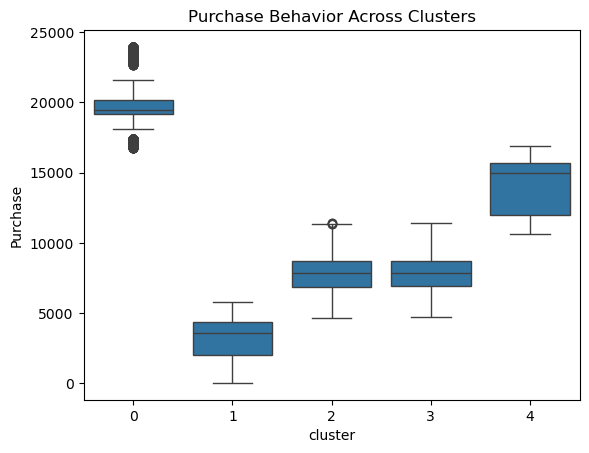

In [71]:
import seaborn as sns

sns.boxplot(x='cluster', y='Purchase', data=X)
plt.title("Purchase Behavior Across Clusters")
plt.show()

In [77]:
# Group by cluster and calculate summary statistics
cluster_stats = X.groupby('cluster')['Purchase'].describe()

# Display the statistics
print(cluster_stats)

            count          mean          std      min      25%      50%  \
cluster                                                                   
0         45980.0  19707.202523  1173.848966  16759.0  19157.0  19455.0   
1        112397.0   3253.508181  1469.131259     12.0   2003.0   3559.0   
2        129702.0   7672.201439  1444.931129   4654.0   6872.0   7812.0   
3        132871.0   7721.536227  1433.241967   4682.0   6890.0   7835.0   
4        129118.0  13963.373813  1883.156387  10639.0  11959.0  14970.5   

              75%      max  
cluster                     
0        20154.25  23961.0  
1         4323.00   5770.0  
2         8667.00  11390.0  
3         8695.00  11398.0  
4        15677.00  16923.0  


### Mapping clusters to descriptive labels 

In [81]:

X['cluster_label'] = X['cluster'].map({
    0: 'High Spenders',
    1: 'Low Spenders',
    2: 'Moderate Buyers',
    3: 'Upper-Moderate Buyers',
    4: 'Aspiring High Spenders'
})

# Save the DataFrame with labeled clusters
X.to_csv('customer_profiles.csv', index=False)

# Preview the updated DataFrame
print(X.head())


   User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001         672       0    0          10              0   
1  1000001        2376       0    0          10              0   
2  1000001         852       0    0          10              0   
3  1000001         828       0    0          10              0   
4  1000002        2734       1    6          16              2   

   Marital_Status  Product_Category_1  Purchase  cluster  \
0               0                   3      8370        2   
1               0                   1     15200        4   
2               0                  12      1422        1   
3               0                  12      1057        1   
4               0                   8      7969        2   

            cluster_label  
0         Moderate Buyers  
1  Aspiring High Spenders  
2            Low Spenders  
3            Low Spenders  
4         Moderate Buyers  
